In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.metrics import Precision, Recall

In [3]:
train_dir = "./cifar-10-img/train"
test_dir = "./cifar-10-img/test"

In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(32, 32),
    color_mode='grayscale',
    batch_size=32,
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(32, 32),
    color_mode='grayscale',
    batch_size=32,
)

Found 40079 files belonging to 10 classes.
Found 9921 files belonging to 10 classes.


In [5]:
for images, labels in train_dataset.take(1):
    print("Shape of images in a batch:", images.shape)  # Expected: (32, 32, 32, 1)
    print("Shape of labels in a batch:", labels.shape)  # Expected: (32,)

Shape of images in a batch: (32, 32, 32, 1)
Shape of labels in a batch: (32,)


In [6]:
def Normalize_image(image, labels):
    return image / 255.0, labels

In [7]:
train_dataset = train_dataset.map(Normalize_image)
test_dataset = test_dataset.map(Normalize_image)

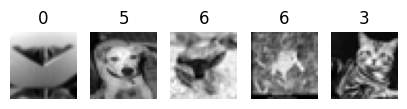

In [8]:
def Display_iamges(dataset, num=5):
    plt.figure(figsize=(5,5))
    for images, labels in dataset.take(1):
        for i in range(num):
            plt.subplot(1, num, i+1)
            plt.imshow(images[i], cmap='gray')
            plt.title(labels[i].numpy())
            plt.axis('off')
        plt.show()
        
Display_iamges(train_dataset)

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [12]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss="sparse_categorical_crossentropy", 
              metrics=['Accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5


1253/1253 [==============================] - 98s 78ms/step - loss: 2.1406 - Accuracy: 0.2137 - val_loss: 2.0432 - val_Accuracy: 0.2653
Epoch 2/5
1253/1253 [==============================] - 28s 22ms/step - loss: 1.9647 - Accuracy: 0.3015 - val_loss: 1.9095 - val_Accuracy: 0.3250
Epoch 3/5
1253/1253 [==============================] - 30s 24ms/step - loss: 1.8207 - Accuracy: 0.3528 - val_loss: 1.8659 - val_Accuracy: 0.3381
Epoch 4/5
1253/1253 [==============================] - 34s 27ms/step - loss: 1.6963 - Accuracy: 0.3978 - val_loss: 1.6465 - val_Accuracy: 0.4163
Epoch 5/5
1253/1253 [==============================] - 32s 25ms/step - loss: 1.6051 - Accuracy: 0.4290 - val_loss: 1.6726 - val_Accuracy: 0.4017
